# Temperature figures for PanAntarctic comparison

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import matplotlib.path as mpath
import xarray as xr
import cf_xarray
import cmocean as cm

### Mapping

In [2]:
# Import the data (names generalised to use for both comparisons)

data_1a = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/bottom_temp_map_Pan01.nc', chunks = 'auto')
data_2a = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/bottom_temp_map_Pan005.nc', chunks = 'auto')

data_1b = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/mid_temp_map_Pan01.nc', chunks = 'auto')
data_2b = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/mid_temp_map_Pan005.nc', chunks = 'auto')

In [3]:
# Land and contour data
shelf_contour_1 = xr.open_dataset('/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_01deg.nc')['contour_masked_above']
shelf_contour_2 = xr.open_dataset('/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_005deg.nc')['contour_masked_above']

depth_1 = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/output050/20050501.ocean_static.nc')['deptho']
land_mask_1 = (0 * depth_1).fillna(1)
land_1 = xr.where(np.isnan(depth_1.rename('land_1')), 1, np.nan)

depth_2 = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-005-zstar-ACCESSyr2/output030/19930701.ocean_static.nc')['deptho']
land_mask_2 = (0 * depth_2).fillna(1)
land_2 = xr.where(np.isnan(depth_2.rename('land_2')), 1, np.nan)

### Time series

In [4]:
# Bottom temp
data_1a_time = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_CT_pan01.nc', chunks = 'auto')
data_2a_time = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_CT_pan005.nc', chunks = 'auto')

# Mid depth
data_1b_time = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/midtemp_anom_CT_pan01.nc', chunks = 'auto')
data_2b_time = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/midtemp_anom_CT_pan005.nc', chunks = 'auto')

In [5]:
print(data_1b_time.min().compute())
print(data_1b_time.max().compute())
print(data_2b_time.min().compute())
print(data_2b_time.max().compute())

<xarray.DataArray ()> Size: 8B
array(-0.00078812)
Coordinates:
    z_l      float64 8B 423.7
<xarray.DataArray ()> Size: 8B
array(0.00078069)
Coordinates:
    z_l      float64 8B 423.7
<xarray.DataArray ()> Size: 4B
array(-0.00080151, dtype=float32)
Coordinates:
    z_l      float64 8B 423.7
<xarray.DataArray ()> Size: 4B
array(0.00057391, dtype=float32)
Coordinates:
    z_l      float64 8B 423.7


In [6]:
data_1a_time_new = data_1a_time.to_series()
data_2a_time_new = data_2a_time.to_series()

data_1b_time_new = data_1b_time.to_series()
data_2b_time_new = data_2b_time.to_series()

In [7]:
# Slice 1910–1919 and 2001–2010
data_1a_time_new = data_1a_time_new['2001-01-01':'2010-10-16']
data_2a_time_new = data_2a_time_new['2001-01-01':'2010-10-16']

data_1b_time_new = data_1b_time_new['2001-01-01':'2010-10-16']
data_2b_time_new = data_2b_time_new['2001-01-01':'2010-10-16']

# Reset index to normalized months
data_1a_time_new.index = range(1, len(data_1a_time_new)+1)
data_2a_time_new.index = range(1, len(data_2a_time_new)+1)

data_1b_time_new.index = range(1, len(data_1b_time_new)+1)
data_2b_time_new.index = range(1, len(data_2b_time_new)+1)

In [9]:
colors = {'pan01_res': '#0000a2',
          'pan005_res': '#E84141',
          'pan01_pre' : '#18669C',
          'access_pre': 'tab:orange'}

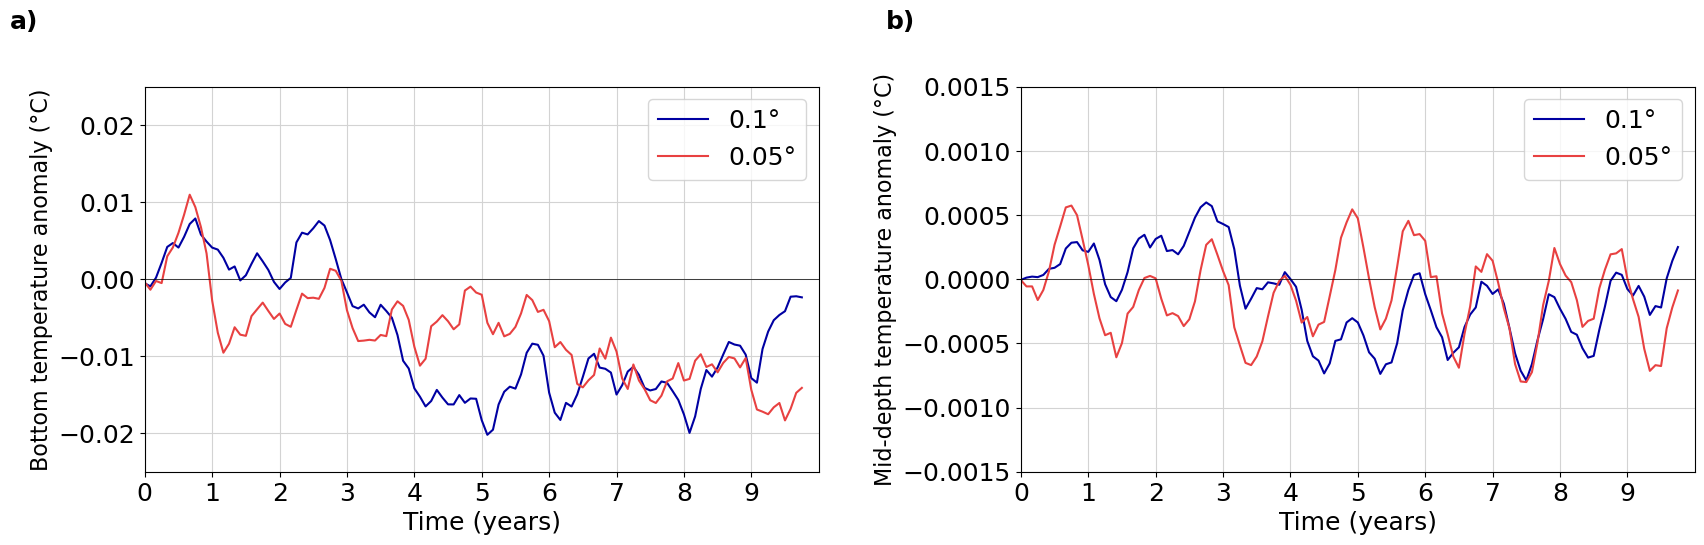

In [14]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 18

# Two panels: bottom and surface
datasets = [
    (data_1a_time_new, data_2a_time_new, "Bottom"),
    (data_1b_time_new, data_2b_time_new, "Surface"),
]

# Create figure with 2 subplots side by side
fig, axes = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 5),
    constrained_layout=False
)

for i, (data1, data2, title) in enumerate(datasets):
    ax = axes[i]

    # Plot both resolutions
    ax.plot(data1.index, data1.values, label="0.1°", color = colors['pan01_res'])
    ax.plot(data2.index, data2.values, label="0.05°", color = colors['pan005_res'])

    # X ticks as years 1–10
    ax.set_xticks(range(1, 121, 12))
    ax.set_xticklabels([str(j) for j in range(0, 10)])

    # Horizontal zero line
    ax.axhline(0, color="black", linewidth=0.5)

    # Y-axis labels depend on subplot
    if i == 0:
        ax.set_ylabel("Bottom temperature anomaly (°C)",fontsize=16)
    else:
        ax.set_ylabel("Mid-depth temperature anomaly (°C)",fontsize=16)

    # X-axis label
    ax.set_xlabel("Time (years)")
    ax.set_xlim(1,121)
    axes[0].set_ylim(-0.025,0.025)
    axes[1].set_ylim(-0.0015,0.0015)

    # Subplot labels (a), (b), etc.
    ax.text(-.2, 1.2, f"{chr(97+i)})", transform=ax.transAxes,
            fontsize=18, fontweight="bold", va="top", ha="left", color="black")

    # Legend + grid
    ax.legend(loc='upper right')
    ax.grid(True, color="lightgrey")

# Add space between subplots
plt.subplots_adjust(wspace=0.3)  # increase horizontal spacing (default ~0.2)

plt.show()

fig.savefig("/g/data/g40/kc5856/thesis_figures/resolution_temperature_timeseries.png",
            dpi=300, bbox_inches='tight')

## Separating bottom from mid-depths

In [25]:
colors = {'pan01_res': '#0000a2',
          'pan005_res': '#E84141',
          'pan01_pre' : '#18669C',
          'access_pre': 'tab:orange'}

In [26]:
import pandas as pd
from scipy.signal import detrend

In [11]:
# Finding natural variability
temp_anom_1 = data_1a_time_new
temp_anom_2 = data_2a_time_new

# Step 1: Detrend the series
temp_anom_1_detrended = pd.Series(detrend(temp_anom_1), index=temp_anom_1.index)
temp_anom_2_detrended = pd.Series(detrend(temp_anom_2), index=temp_anom_2.index)

# Step 2: Smooth with 10-year running mean (for monthly data, window=120)
running_mean_1 = temp_anom_1_detrended.rolling(window=118, center=True, min_periods=1).mean()
running_mean_2 = temp_anom_2_detrended.rolling(window=118, center=True, min_periods=1).mean()

# Step 3: Calculate natural variability residual
natural_variability_1 = temp_anom_1_detrended - running_mean_1
natural_variability_2 = temp_anom_2_detrended - running_mean_2

# Step 4: Calculate standard deviation of natural variability (ignoring NaNs)
std_nat_var_1 = natural_variability_1.std()
std_nat_var_2 = natural_variability_2.std()

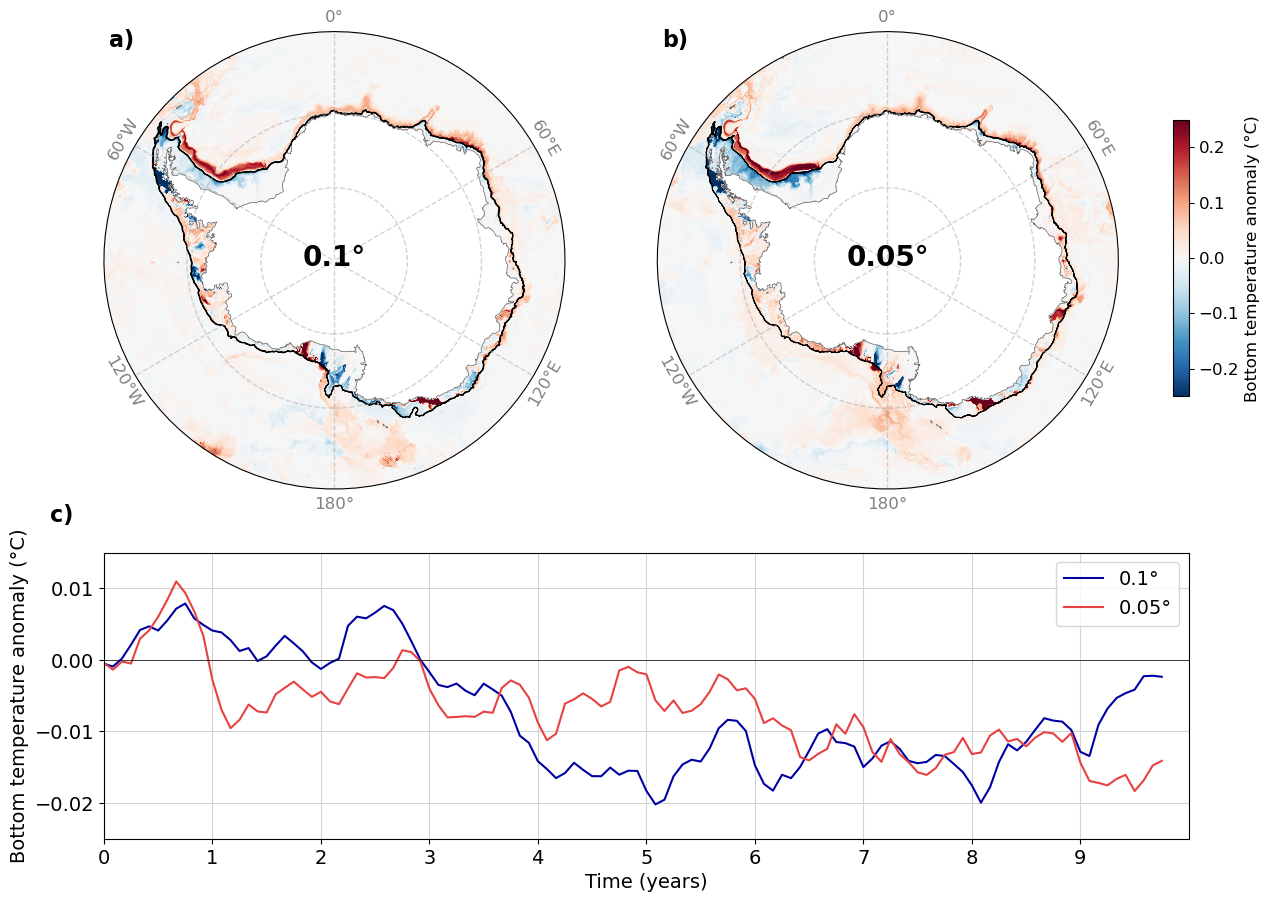

In [12]:
plt.rcParams['font.size'] = 14

# Projection
projection = ccrs.SouthPolarStereo()

# ---- FIGURE LAYOUT ----
fig = plt.figure(figsize=(14, 12))  # taller to fit timeseries
gs = fig.add_gridspec(2, 2, height_ratios=[1.2, 0.5], hspace=-0.1)

# Top row: 2 map subplots
ax_map1 = fig.add_subplot(gs[0,0], projection=projection)
ax_map2 = fig.add_subplot(gs[0,1], projection=projection)
axes_maps = [ax_map1, ax_map2]

# Bottom row: 1 time series spanning both columns
ax_ts = fig.add_subplot(gs[1,:])

# ---- SHARED CIRCLE BOUNDARY FOR MAPS ----
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.495], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# ---- MAP PLOTTING (your existing loop) ----
datasets = [data_1a, data_2a] 
land_masks = [land_1, land_2]
land_contours = [land_mask_1, land_mask_2]
shelf_masks = [shelf_contour_1, shelf_contour_2]
titles = ["0.1°", "0.05°"]

label_lon = ['0°', '180°', '60°E', '120°W', '120°E', '60°W']
rot_lon   = [0, 0, -60, -60, 60, 60]
lat_lon_label = [-57.5, -57.5, -57.5, -57.5, -57.5, -57.5]

for i, (ax, data, land_m, land_contour, shelf_m, title) in enumerate(
    zip(axes_maps, datasets, land_masks, land_contours, shelf_masks, titles)):

    ax.set_extent([-280, 80, -80, -59], crs=ccrs.PlateCarree())
    ax.set_boundary(circle, transform=ax.transAxes)

    # Land
    land_m.plot.contourf(ax=ax, colors='white', zorder=2,
                         transform=ccrs.PlateCarree(), add_colorbar=False)

    # Coastline
    ax.contour(land_contour.cf['X'], land_contour.cf['Y'], land_contour,
               levels=[0,1], colors='dimgrey', linewidths=0.5,
               transform=ccrs.PlateCarree())

    # Shelf
    ax.contour(shelf_m.cf['X'], shelf_m.cf['Y'], shelf_m,
               levels=[0,1], colors='black', linewidths=0.6,
               transform=ccrs.PlateCarree())

    # Gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=1, xlocs=range(-180, 171, 60), ylocs=[],
                      color='darkgray', alpha=0.5, linestyle='--', zorder=10)
    gl2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                       linewidth=1, xlocs=[], ylocs=(-80,-70,-55),
                       color='darkgray', alpha=0.5, linestyle='--', zorder=10)

    # Manual lon labels
    for j, position in enumerate([0, 180, 60, -120, 120, -60]):
        ax.text(position, lat_lon_label[j], label_lon[j], rotation=rot_lon[j],
                ha='center', va='center', color='gray', fontsize=12,
                transform=ccrs.PlateCarree())

    # Data
    im = data.plot(
        x="xh", y="yh",
        transform=ccrs.PlateCarree(),
        vmin=-0.25, vmax=0.25,
        extend="both",
        cmap=plt.get_cmap('RdBu').reversed(),
        add_colorbar=False,
        ax=ax,
    )

    ax.set_title("")
    ax.text(
        0.5, 0.5, title,
        transform=ax.transAxes,
        ha='center', va='center',
        fontsize=20, fontweight='bold',
        color='black', zorder=20
    )
    
    # Labels (a), (b)
    ax.text(0.01,1, f'{chr(97+i)})', transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='left', color='black')

# ---- COLORBAR (shared for maps) ----
cbar = fig.colorbar(
    im, ax=axes_maps, orientation="vertical",
    fraction=0.015, aspect=17, shrink=0.8, pad=0.05
)
cbar.set_label("Bottom temperature anomaly (°C)", fontsize=12)
cbar.ax.tick_params(labelsize=12)

# ---- TIME SERIES PANEL (c) ----
ax_ts.plot(data_1a_time_new.index, data_1a_time_new.values, label="0.1°",color=colors['pan01_res'])
ax_ts.plot(data_2a_time_new.index, data_2a_time_new.values, label="0.05°",color=colors['pan005_res'])

ax_ts.set_xticks(range(1,121,12))
ax_ts.set_xticklabels([str(j) for j in range(0,10)])
ax_ts.axhline(0, color="black", linewidth=0.5)

ax_ts.set_ylabel("Bottom temperature anomaly (°C)")
ax_ts.set_xlabel("Time (years)")
ax_ts.set_xlim(1,121)
ax_ts.set_ylim(-0.025,0.015)

# Label (c)
ax_ts.text(-0.05,1.17,"c)", transform=ax_ts.transAxes,
           fontsize=16, fontweight="bold", va="top", ha="left", color="black")

ax_ts.legend(loc="upper right")
ax_ts.grid(True, color="lightgrey")

# ---- SAVE ----
plt.show()
fig.savefig("/g/data/g40/kc5856/thesis_figures/resolution_bottom_temp_combined_variability.png",
            dpi=300, bbox_inches="tight")


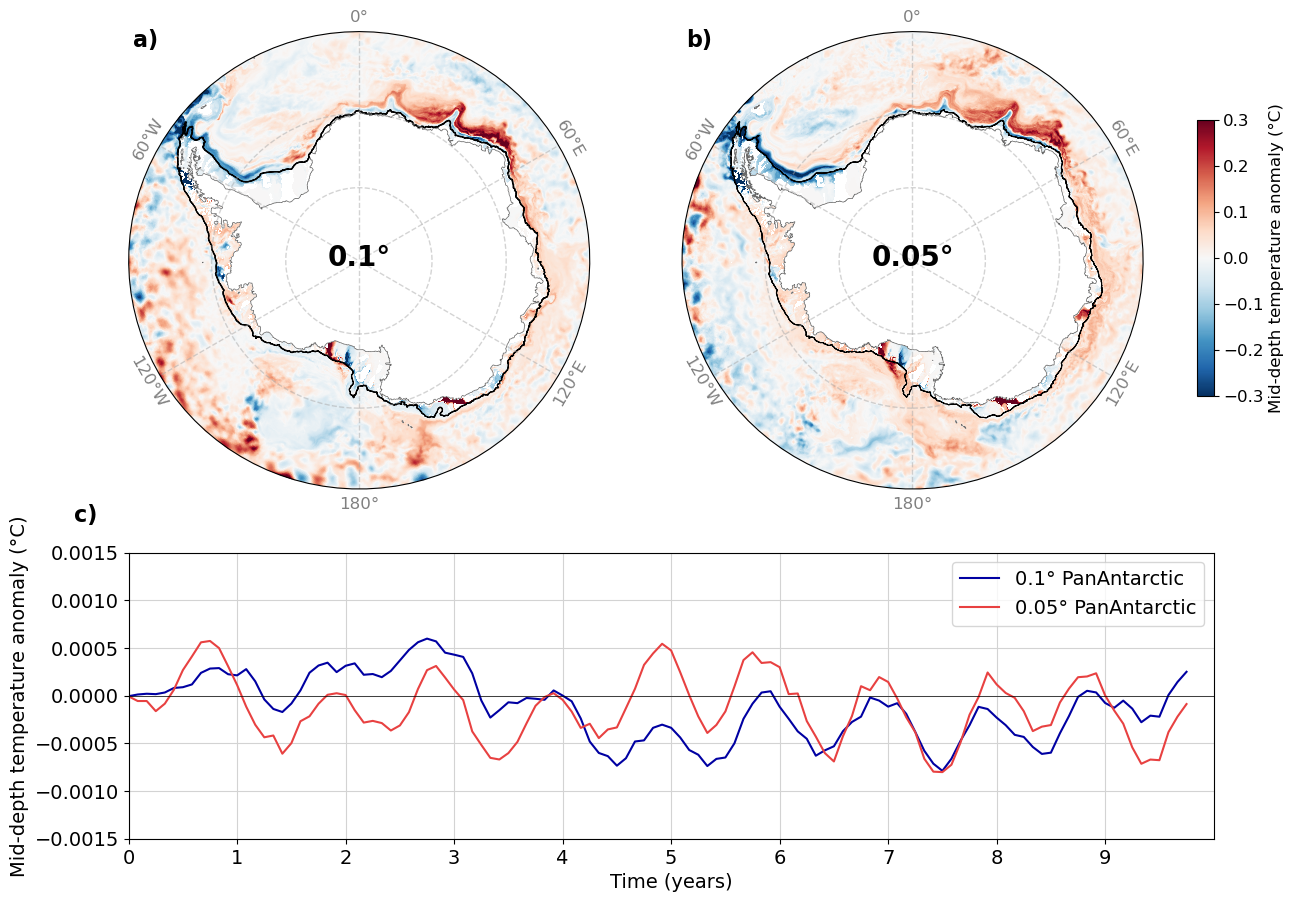

In [13]:
plt.rcParams['font.size'] = 14

# Projection
projection = ccrs.SouthPolarStereo()

# ---- FIGURE LAYOUT ----
fig = plt.figure(figsize=(14, 12))  # taller to fit timeseries
gs = fig.add_gridspec(2, 2, height_ratios=[1.2, 0.5], hspace=-0.1)

# Top row: 2 map subplots
ax_map1 = fig.add_subplot(gs[0,0], projection=projection)
ax_map2 = fig.add_subplot(gs[0,1], projection=projection)
axes_maps = [ax_map1, ax_map2]

# Bottom row: 1 time series spanning both columns
ax_ts = fig.add_subplot(gs[1,:])

# ---- SHARED CIRCLE BOUNDARY FOR MAPS ----
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.495], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# ---- MAP PLOTTING (your existing loop) ----
datasets = [data_1b, data_2b] 
land_masks = [land_1, land_2]
land_contours = [land_mask_1, land_mask_2]
shelf_masks = [shelf_contour_1, shelf_contour_2]
titles = ["0.1°", "0.05°"]

label_lon = ['0°', '180°', '60°E', '120°W', '120°E', '60°W']
rot_lon   = [0, 0, -60, -60, 60, 60]
lat_lon_label = [-57.5, -57.5, -57.5, -57.5, -57.5, -57.5]

for i, (ax, data, land_m, land_contour, shelf_m, title) in enumerate(
    zip(axes_maps, datasets, land_masks, land_contours, shelf_masks, titles)):

    ax.set_extent([-280, 80, -80, -59], crs=ccrs.PlateCarree())
    ax.set_boundary(circle, transform=ax.transAxes)

    # Land
    land_m.plot.contourf(ax=ax, colors='white', zorder=2,
                         transform=ccrs.PlateCarree(), add_colorbar=False)

    # Coastline
    ax.contour(land_contour.cf['X'], land_contour.cf['Y'], land_contour,
               levels=[0,1], colors='dimgrey', linewidths=0.5,
               transform=ccrs.PlateCarree())

    # Shelf
    ax.contour(shelf_m.cf['X'], shelf_m.cf['Y'], shelf_m,
               levels=[0,1], colors='black', linewidths=0.6,
               transform=ccrs.PlateCarree())

    # Gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=1, xlocs=range(-180, 171, 60), ylocs=[],
                      color='darkgray', alpha=0.5, linestyle='--', zorder=10)
    gl2 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                       linewidth=1, xlocs=[], ylocs=(-80,-70,-55),
                       color='darkgray', alpha=0.5, linestyle='--', zorder=10)

    # Manual lon labels
    for j, position in enumerate([0, 180, 60, -120, 120, -60]):
        ax.text(position, lat_lon_label[j], label_lon[j], rotation=rot_lon[j],
                ha='center', va='center', color='gray', fontsize=12,
                transform=ccrs.PlateCarree())

    # Data
    im = data.plot(
        x="xh", y="yh",
        transform=ccrs.PlateCarree(),
        vmin=-0.3, vmax=0.3,
        extend="both",
        cmap=plt.get_cmap('RdBu').reversed(),
        add_colorbar=False,
        ax=ax,
    )

    ax.set_title("")
    ax.text(
        0.5, 0.5, title,
        transform=ax.transAxes,
        ha='center', va='center',
        fontsize=20, fontweight='bold',
        color='black', zorder=20
    )
    
    # Labels (a), (b)
    ax.text(0.01,1, f'{chr(97+i)})', transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='left', color='black')

# ---- COLORBAR (shared for maps) ----
cbar = fig.colorbar(
    im, ax=axes_maps, orientation="vertical",
    fraction=0.015, aspect=17, shrink=0.8, pad=0.05
)
cbar.set_label("Mid-depth temperature anomaly (°C)", fontsize=12)
cbar.ax.tick_params(labelsize=12)

# ---- TIME SERIES PANEL (c) ----
plt.rcParams['font.size'] = 14

ax_ts.plot(data_1b_time_new.index, data_1b_time_new.values, label="0.1° PanAntarctic",color=colors['pan01_res'])
ax_ts.plot(data_2b_time_new.index, data_2b_time_new.values, label="0.05° PanAntarctic",color=colors['pan005_res'])

ax_ts.set_xticks(range(1,121,12))
ax_ts.set_xticklabels([str(j) for j in range(0,10)])#, fontsize=12)
ax_ts.axhline(0, color="black", linewidth=0.5)

ax_ts.set_ylabel("Mid-depth temperature anomaly (°C)")#, fontsize=12)
ax_ts.set_xlabel("Time (years)")#, fontsize=12)
ax_ts.set_xlim(1,121)
ax_ts.set_ylim(-0.0015,0.0015)

# Label (c)
ax_ts.text(-0.05,1.17,"c)", transform=ax_ts.transAxes,
           fontsize=16, fontweight="bold", va="top", ha="left", color="black")

ax_ts.legend(loc="upper right")
ax_ts.grid(True, color="lightgrey")

# ---- SAVE ----
plt.show()
fig.savefig("/g/data/g40/kc5856/thesis_figures/resolution_middepth_temp_combined.png",
            dpi=300, bbox_inches="tight")


## Regional

Called salt but I have imported temperature data. Just saving time on renaming. 

In [27]:
from pathlib import Path
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import gridspec

In [28]:
# Importing data
pan01_botsalt_1 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Adelie_pan01.nc', chunks='auto') 
pan005_botsalt_1 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Adelie_pan005.nc', chunks='auto')

pan01_botsalt_2 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Ross_pan01.nc', chunks='auto') 
pan005_botsalt_2 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Ross_pan005.nc', chunks='auto')

pan01_botsalt_3 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Am_pan01.nc', chunks='auto') 
pan005_botsalt_3 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Am_pan005.nc', chunks='auto')

pan01_botsalt_4 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Be_pan01.nc', chunks='auto') 
pan005_botsalt_4 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Be_pan005.nc', chunks='auto')

pan01_botsalt_5 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Weddell_pan01.nc', chunks='auto') 
pan005_botsalt_5 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Weddell_pan005.nc', chunks='auto')

pan01_botsalt_6 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Prydz_pan01.nc', chunks='auto') 
pan005_botsalt_6 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Prydz_pan005.nc', chunks='auto')

In [29]:
pan01_botsalt_1_new = pan01_botsalt_1.to_series()
pan005_botsalt_1_new = pan005_botsalt_1.to_series()

pan01_botsalt_2_new = pan01_botsalt_2.to_series()
pan005_botsalt_2_new = pan005_botsalt_2.to_series()

pan01_botsalt_3_new = pan01_botsalt_3.to_series()
pan005_botsalt_3_new = pan005_botsalt_3.to_series()

pan01_botsalt_4_new = pan01_botsalt_4.to_series()
pan005_botsalt_4_new = pan005_botsalt_4.to_series()

pan01_botsalt_5_new = pan01_botsalt_5.to_series()
pan005_botsalt_5_new = pan005_botsalt_5.to_series()

pan01_botsalt_6_new = pan01_botsalt_6.to_series()
pan005_botsalt_6_new = pan005_botsalt_6.to_series()

In [30]:
# Reset index to normalized months
pan01_botsalt_1_new.index = range(0, len(pan01_botsalt_1_new))
pan005_botsalt_1_new.index = range(0, len(pan005_botsalt_1_new))

pan01_botsalt_2_new.index = range(0, len(pan01_botsalt_2_new))
pan005_botsalt_2_new.index = range(0, len(pan005_botsalt_2_new))

pan01_botsalt_3_new.index = range(0, len(pan01_botsalt_3_new))
pan005_botsalt_3_new.index = range(0, len(pan005_botsalt_3_new))

pan01_botsalt_4_new.index = range(0, len(pan01_botsalt_4_new))
pan005_botsalt_4_new.index = range(0, len(pan005_botsalt_4_new))

pan01_botsalt_5_new.index = range(0, len(pan01_botsalt_5_new))
pan005_botsalt_5_new.index = range(0, len(pan005_botsalt_5_new))

pan01_botsalt_6_new.index = range(0, len(pan01_botsalt_6_new))
pan005_botsalt_6_new.index = range(0, len(pan005_botsalt_6_new))

In [31]:
path_to_ocean_static = Path('/g/data/ol01/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/output021/20000701.ocean_static.nc')
ocean_static = xr.open_dataset(path_to_ocean_static)

deptho = ocean_static['deptho']
xh = ocean_static['xh']
yh = ocean_static['yh']

/jobfs/153947330.gadi-pbs/ipykernel_1574576/306945788.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


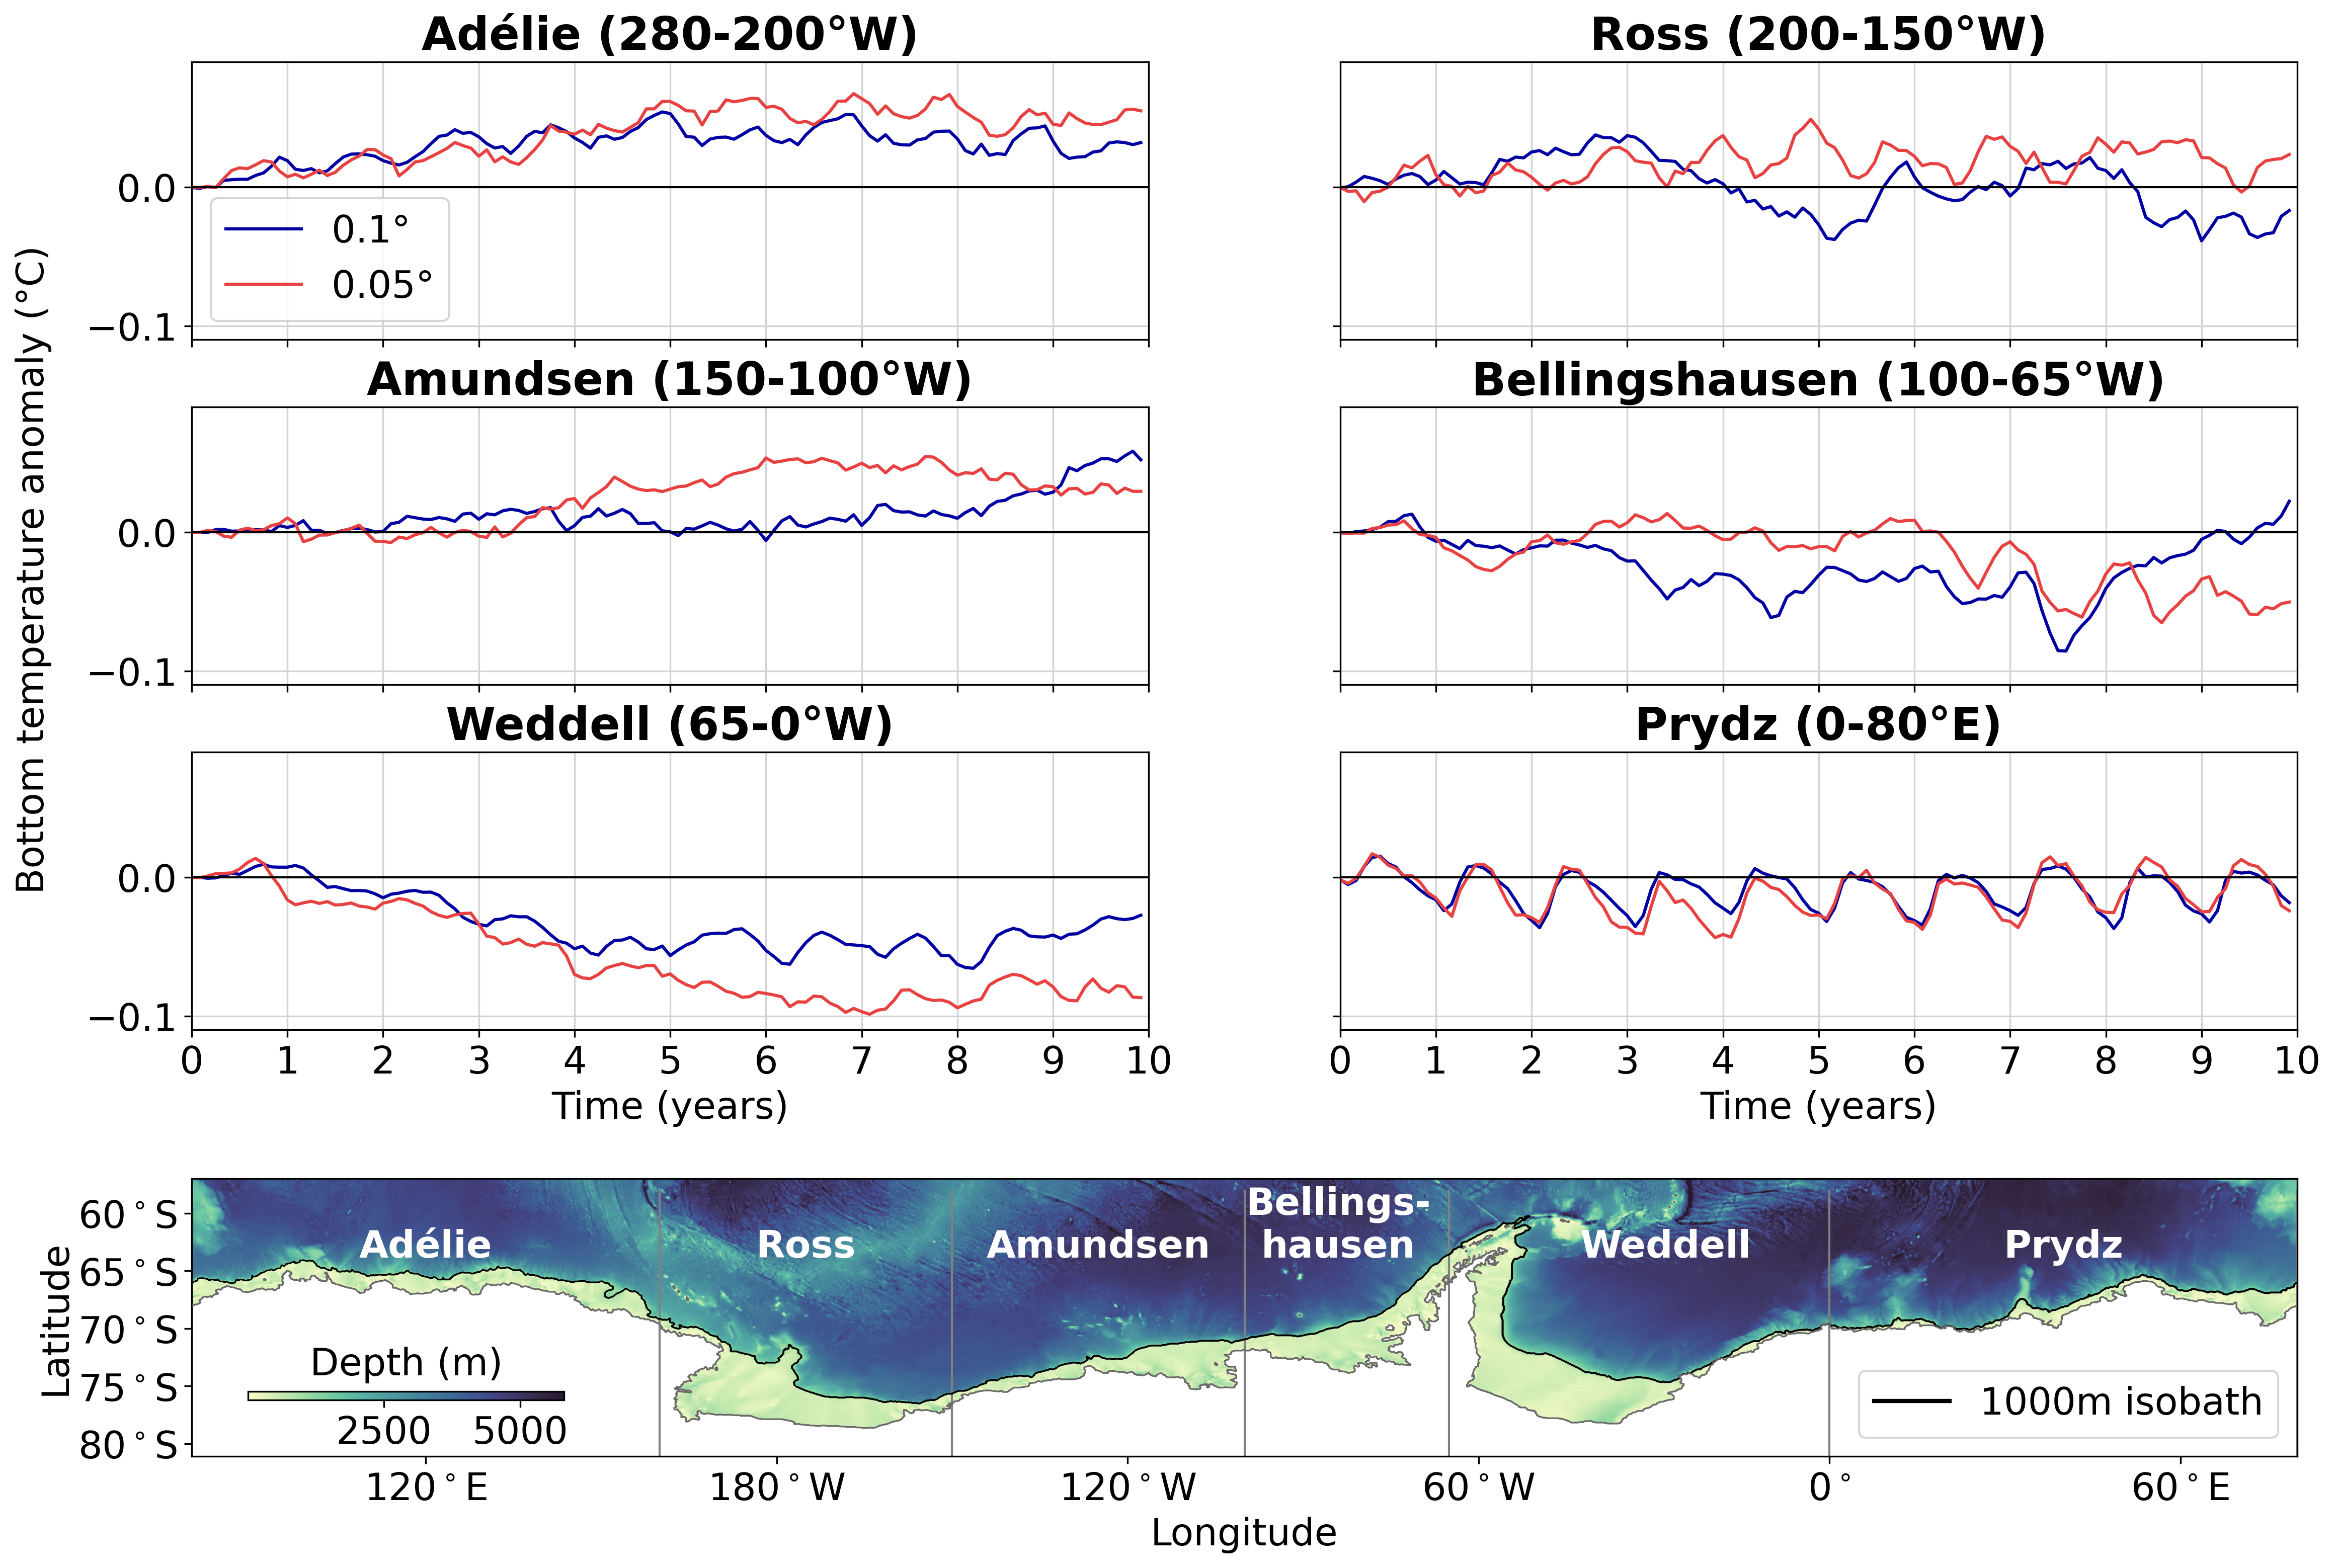

In [35]:
plt.rcParams['font.size'] = 18

# --- Create figure with 5 rows (spacer row before bathy) ---
fig = plt.figure(figsize=(18, 12), dpi=300)
gs = gridspec.GridSpec(
    nrows=5, ncols=2,
    height_ratios=[1, 1, 1, 0.05, 1],  # small spacer row before bathy
    figure=fig,
    hspace=0.3  # small space between top three rows
)

# --- Time series axes (rows 0-2) ---
axes = [fig.add_subplot(gs[i]) for i in range(6)]  # rows 0-2

# First subplot
pan01_botsalt_1_new.plot(ax=axes[0], label="0.1°", color=colors['pan01_res'])
pan005_botsalt_1_new.plot(ax=axes[0], label="0.05°", color=colors['pan005_res'])
axes[0].set_title("Adélie (280-200°W)",fontweight='bold')
axes[0].legend(loc="lower left")

# Second subplot
pan01_botsalt_2_new.plot(ax=axes[1], label="PanAn 1/10th", color=colors['pan01_res'])
pan005_botsalt_2_new.plot(ax=axes[1], label="PanAn 1/20th", color=colors['pan005_res'])
axes[1].set_title("Ross (200-150°W)",fontweight='bold')

# Third subplot
pan01_botsalt_3_new.plot(ax=axes[2], label="PanAn 1/10th", color=colors['pan01_res'])
pan005_botsalt_3_new.plot(ax=axes[2], label="PanAn 1/20th", color=colors['pan005_res'])
axes[2].set_title("Amundsen (150-100°W)",fontweight='bold')

# Fourth subplot
pan01_botsalt_4_new.plot(ax=axes[3], label="PanAn 1/10th", color=colors['pan01_res'])
pan005_botsalt_4_new.plot(ax=axes[3], label="PanAn 1/20th", color=colors['pan005_res'])
axes[3].set_title("Bellingshausen (100-65°W)",fontweight='bold')

# Fifth subplot
pan01_botsalt_5_new.plot(ax=axes[4], label="0.1°", color=colors['pan01_res'])
pan005_botsalt_5_new.plot(ax=axes[4], label="0.05°", color=colors['pan005_res'])
axes[4].set_title("Weddell (65-0°W)",fontweight='bold')

# Sixth subplot
pan01_botsalt_6_new.plot(ax=axes[5], label="PanAn 1/10th", color=colors['pan01_res'])
pan005_botsalt_6_new.plot(ax=axes[5], label="PanAn 1/20th", color=colors['pan005_res'])
axes[5].set_title("Prydz (0-80°E)",fontweight='bold')

# Apply consistent y-limits, grid, horizontal line
for ax in axes:
    ax.axhline(y=0, color='black', linewidth=1)
    ax.set_ylim(-0.11, 0.09)
    ax.set_xlim(0,10)
    ax.grid(True, color='lightgrey')

# Remove y-axis ticks from right column
for ax in axes[1::2]:
    ax.set_yticklabels([])

# Common Y label
fig.text(0.06, 0.6, "Bottom temperature anomaly (°C)", va='center', rotation='vertical')

# X-ticks
ticks = range(0, 121, 12)
labels = [str(i) for i in range(len(ticks))]
plt.setp(axes, xticks=ticks, xticklabels=labels)

# Only bottom row gets x-axis labels
for ax in axes[:-2]:
    ax.set_xlabel("")
    ax.set_xticklabels([])
for ax in axes[-2:]:
    ax.set_xlabel("Time (years)")

# --- Bathymetry panel (fifth row, after spacer) ---
ax_bathy = fig.add_subplot(gs[4, :])  # spans both columns
h_plot = deptho.plot(ax=ax_bathy, cmap=cm.cm.deep, add_colorbar=False)

# Colorbar inside bottom-left of bathy plot, label above
cax = inset_axes(ax_bathy,
                 width="15%",    # width relative to axes
                 height="3%",    # height relative to axes
                 loc='lower left',
                 borderpad=1.5)
cbar = fig.colorbar(h_plot, cax=cax, orientation='horizontal')
cax.xaxis.set_label_position('top')
cbar.set_label("Depth (m)", labelpad=8)

# Contours
ax_bathy.contour(shelf_contour_1.cf['X'], shelf_contour_1.cf['Y'], shelf_contour_1,
                 levels=[0.5], colors='black', linewidths=0.5, zorder=4)
ax_bathy.contour(land_mask_1.cf['X'], land_mask_1.cf['Y'], land_mask_1,
                 levels=[0.5], colors='dimgrey', linewidths=0.8, zorder=5)

# Region lines + labels
ax_bathy.vlines([-280, -200, -150, -100, -65, 0, 80], -82, -58, color='grey', linewidth=1)
region_labels = ['Adélie', 'Ross', 'Amundsen', 'Bellings-\nhausen', 'Weddell', 'Prydz']
region_lons   = [-240, -175, -125, -84, -28, 40]
for x, name in zip(region_lons, region_labels):
    ax_bathy.text(x, -64.5, name, ha='center', va='bottom', color='w',fontweight='bold')

# Fake legend
ax_bathy.plot([0, 1], [0, 1], color='k', linewidth=2, label='1000m isobath')
ax_bathy.legend(loc='lower right')

# Axes labels, ticks
ax_bathy.set_ylabel('Latitude', labelpad = 2)
ax_bathy.set_xlabel('Longitude')
ax_bathy.set_ylim(min(yh.values), -57)
ax_bathy.set_xticks([-240, -180, -120, -60, 0, 60])
ax_bathy.set_xticklabels(('120$^\circ$E', '180$^\circ$W', '120$^\circ$W',
                          '60$^\circ$W', '0$^\circ$', '60$^\circ$E'))
ax_bathy.set_yticks([-80, -75, -70, -65, -60])
ax_bathy.set_yticklabels(('80$^\circ$S', '75$^\circ$S', '70$^\circ$S',
                          '65$^\circ$S', '60$^\circ$S'))

plt.tight_layout()
fig.savefig("/g/data/g40/kc5856/thesis_figures/resolution_temperature_timeseries_regional_with_bathy.png",
            dpi=300, bbox_inches='tight')
plt.show()


/jobfs/153947330.gadi-pbs/ipykernel_1574576/4242994710.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


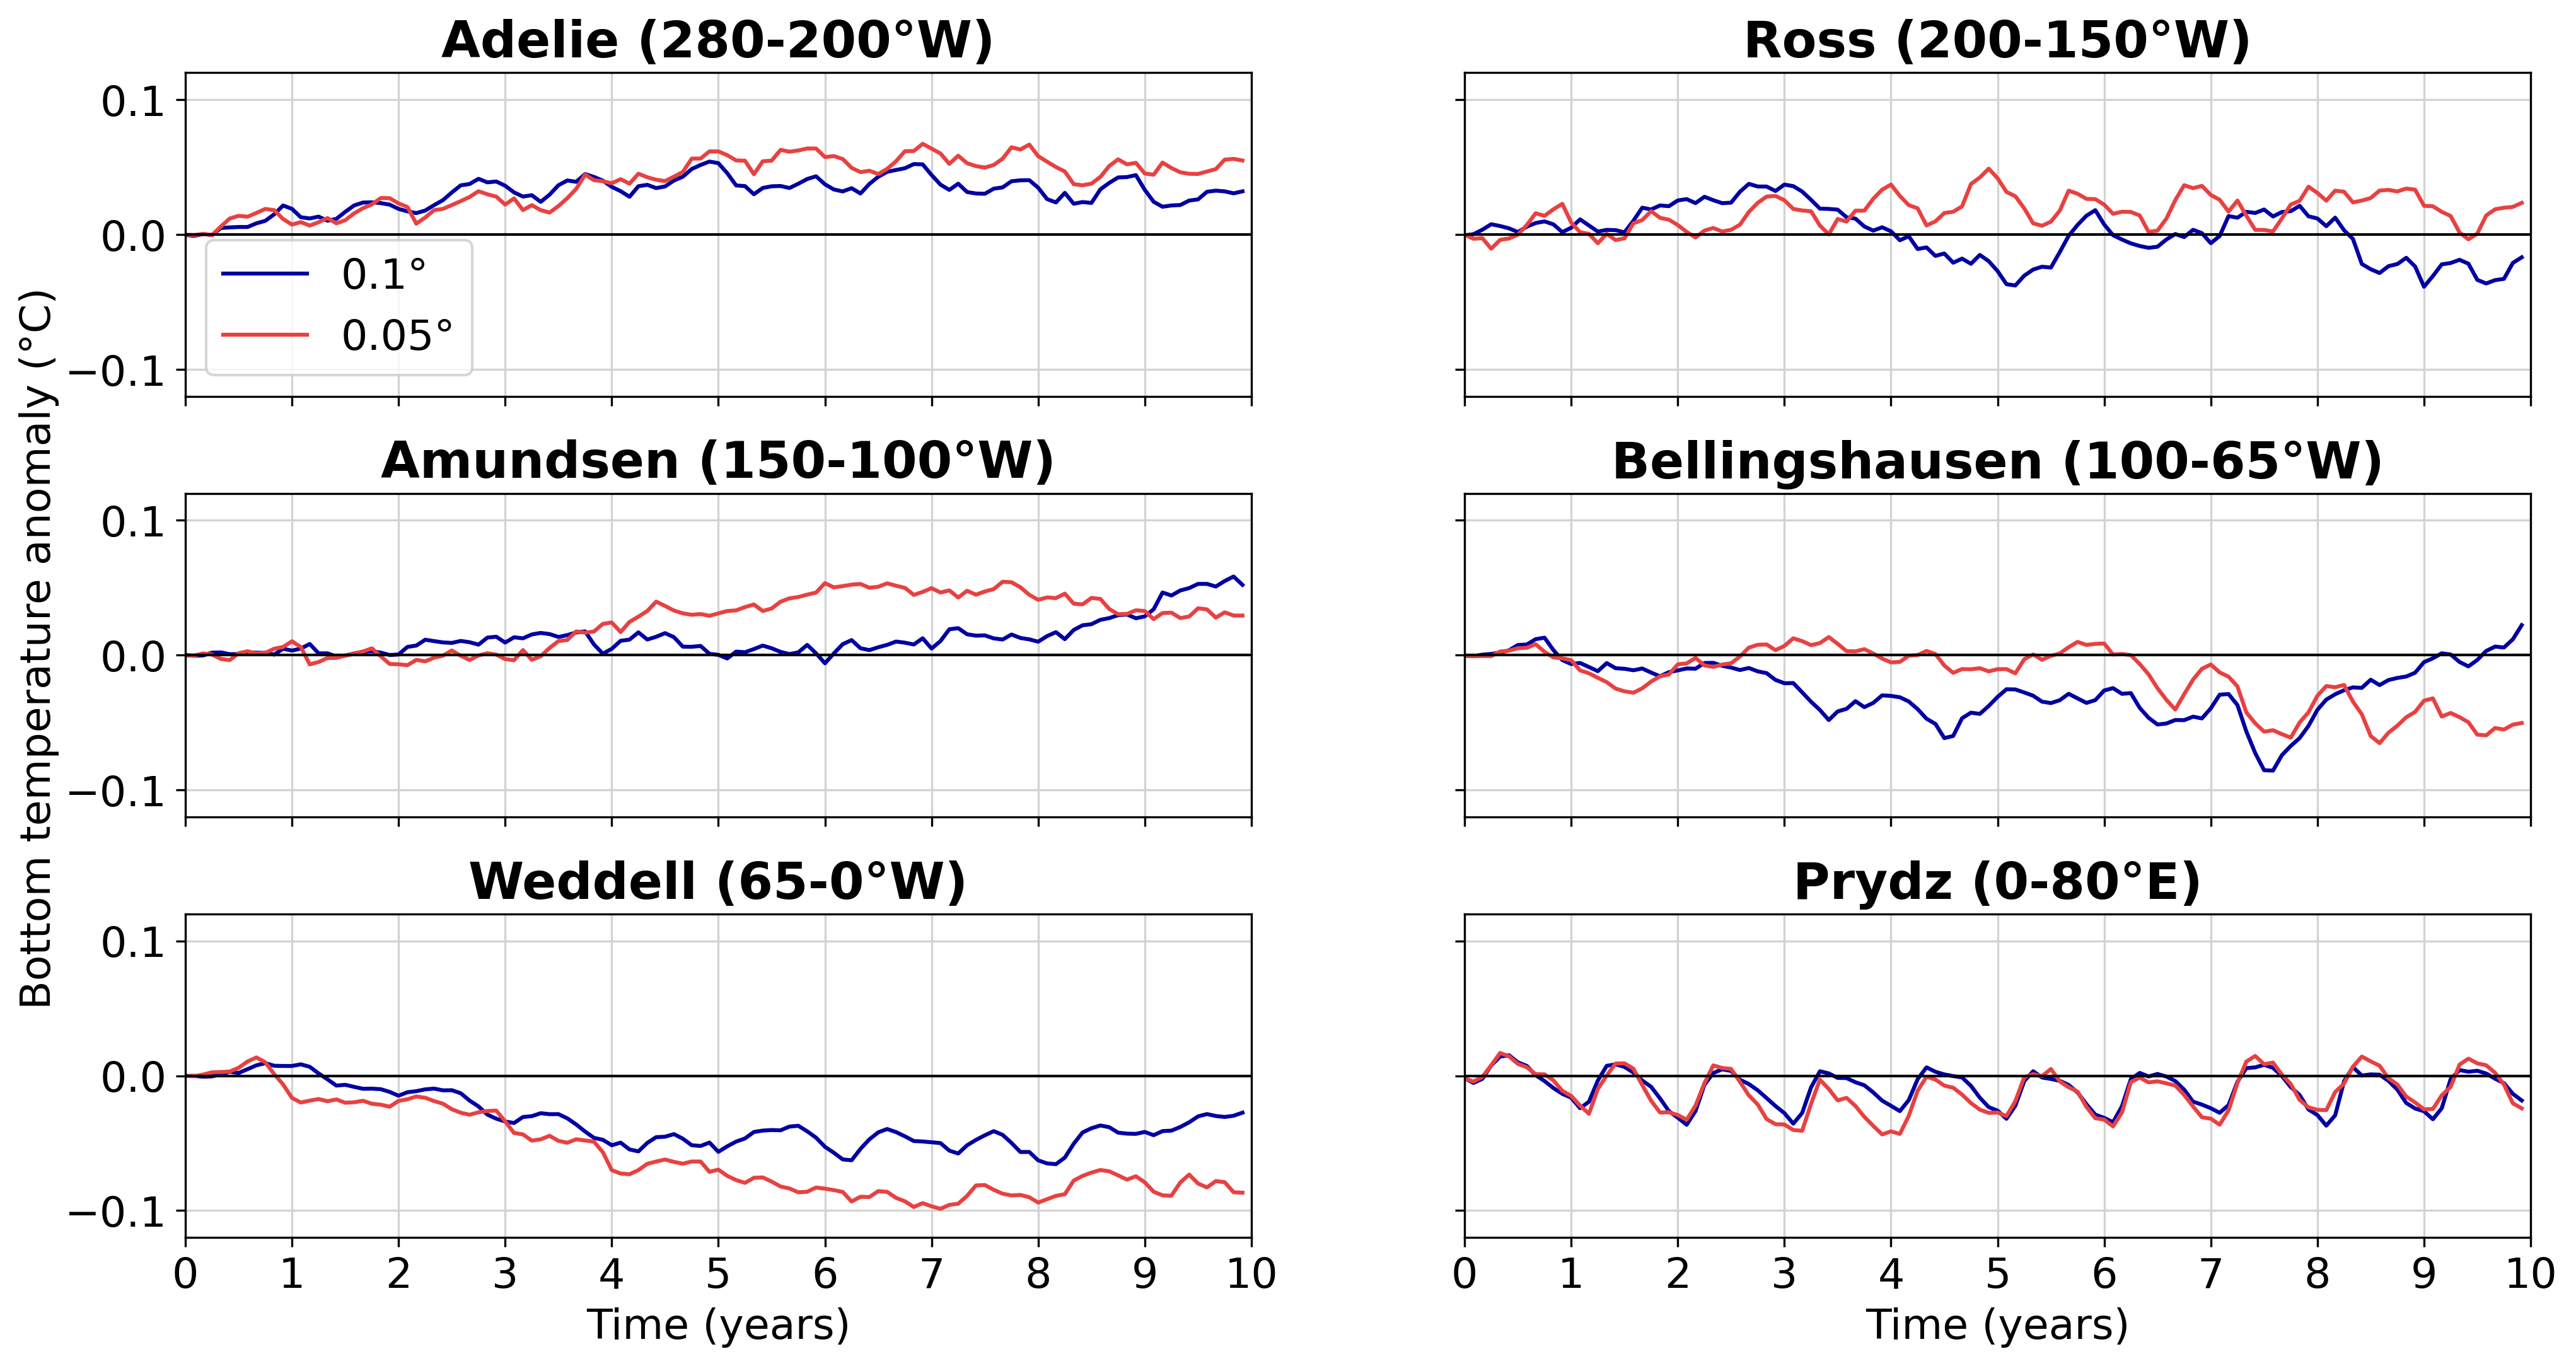

In [16]:
plt.rcParams['font.size'] = 16

# --- Create figure with 5 rows (spacer row before bathy) ---
fig = plt.figure(figsize=(16, 8), dpi=300)
gs = gridspec.GridSpec(
    nrows=3, ncols=2,
    height_ratios=[1, 1, 1],  # small spacer row before bathy
    figure=fig,
    hspace=0.3  # small space between top three rows
)

# --- Time series axes (rows 0-2) ---
axes = [fig.add_subplot(gs[i]) for i in range(6)]  # rows 0-2

# First subplot: 
pan01_botsalt_1_new.plot(ax=axes[0], label="0.1°", color=colors['pan01_res'])
pan005_botsalt_1_new.plot(ax=axes[0], label="0.05°", color=colors['pan005_res'])
axes[0].set_title("Adelie (280-200°W)",fontweight='bold',)
axes[0].legend(loc="lower left")

# Second subplot: 
pan01_botsalt_2_new.plot(ax=axes[1], label="0.1°", color=colors['pan01_res'])
pan005_botsalt_2_new.plot(ax=axes[1], label="0.05°", color=colors['pan005_res'])
axes[1].set_title("Ross (200-150°W)",fontweight='bold',)

# Third subplot: 
pan01_botsalt_3_new.plot(ax=axes[2], label="PanAntarctic", color=colors['pan01_res'])
pan005_botsalt_3_new.plot(ax=axes[2], label="ACCESS-OM2-01", color=colors['pan005_res'])
axes[2].set_title("Amundsen (150-100°W)",fontweight='bold',)


# Fourth subplot: 
pan01_botsalt_4_new.plot(ax=axes[3], label="PanAntarctic", color=colors['pan01_res'])
pan005_botsalt_4_new.plot(ax=axes[3], label="ACCESS-OM2-01", color=colors['pan005_res'])
axes[3].set_title("Bellingshausen (100-65°W)",fontweight='bold',)

# Fifth subplot: 
pan01_botsalt_5_new.plot(ax=axes[4], label="0.1°", color=colors['pan01_res'])
pan005_botsalt_5_new.plot(ax=axes[4], label="0.05°", color=colors['pan005_res'])
axes[4].set_title("Weddell (65-0°W)",fontweight='bold',)

# Sixth subplot: 
pan01_botsalt_6_new.plot(ax=axes[5], label="PanAntarctic", color=colors['pan01_res'])
pan005_botsalt_6_new.plot(ax=axes[5], label="ACCESS-OM2-01", color=colors['pan005_res'])
axes[5].set_title("Prydz (0-80°E)",fontweight='bold',)


# Apply consistent y-limits, grid, horizontal line
for ax in axes:
    ax.axhline(y=0, color='black', linewidth=1)
    ax.set_ylim(-0.12, 0.12)
    ax.set_xlim(0,10)
    ax.grid(True, color='lightgrey')

# Remove y-axis ticks from right column
for ax in axes[1::2]:
    ax.set_yticklabels([])

# Common Y label
fig.text(0.07, 0.5, "Bottom temperature anomaly (°C)", va='center', rotation='vertical')

# X-ticks
ticks = range(0, 121, 12)
labels = [str(i) for i in range(len(ticks))]
plt.setp(axes, xticks=ticks, xticklabels=labels)

# Only bottom row gets x-axis labels
for ax in axes[:-2]:
    ax.set_xlabel("")
    ax.set_xticklabels([])
for ax in axes[-2:]:
    ax.set_xlabel("Time (years)")
    
plt.tight_layout()
fig.savefig("/g/data/g40/kc5856/thesis_figures/resolution_bottom_temp_timeseries_regional_no_bathy.png",
            dpi=300, bbox_inches='tight')
plt.show()


# Quantifying particular regions
First I want to look at bottom temperature in Weddell.

In [4]:
data_1a_C = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/bottom_temp_cont_map_Pan01.nc')
data_2a_C = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/bottom_temp_cont_map_Pan005.nc')

data_1a_M = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/bottom_temp_melt_map_Pan01.nc')
data_2a_M = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/bottom_temp_melt_map_Pan005.nc')

In [5]:
data_1b_C = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/mid_temp_cont_map_Pan01.nc')
data_2b_C = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/mid_temp_cont_map_Pan005.nc')

data_1b_M = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/mid_temp_melt_map_Pan01.nc')
data_2b_M = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/mid_temp_melt_map_Pan005.nc')

In [22]:
# Shelf mask

def shelf_mask_isobath(var, model_dict):

    paths = {
             "mom5": "/g/data/ik11/grids/Antarctic_slope_contour_1000m.npz",
             "mom6_01": "/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_01deg.nc",
            "mom6_005": "/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_005deg.nc"
             }

    var = var.cf.sel({'latitude': slice(-90, -59)})

    if paths[model_dict][-3:] == '.nc':
        shelf_mask = xr.open_dataset(paths[model_dict])['contour_masked_above']
    else:
        contour_file = np.load(paths[model_dict])
        shelf_mask = xr.DataArray(contour_file['contour_masked_above'],
                                  coords = var.coords, 
                                  dims = var.dims,
                                  name = 'contour_masked_above')
    
    shelf_mask = xr.where(shelf_mask == 0, 1, 0)
    masked_var = var * shelf_mask
    
    return masked_var, shelf_mask

In [7]:
def mask_from_polygon(lon, lat, xh, yh):
    polygon = [(lon[0], lat[0])]
    for l in range(1, len(lon)):
        polygon += [(lon[l], lat[l])]
    poly_path = mpath.Path(polygon)

    x, y = xr.broadcast(xh, yh)
    coors = np.hstack((x.values.reshape(-1, 1), y.values.reshape(-1, 1)))

    mask = poly_path.contains_points(coors)
    mask = mask.reshape(xh.size, yh.size).transpose()
    mask = xr.DataArray(
    mask, dims=['yh', 'xh'],
    coords={'xh': xh, 'yh': yh})
    return mask

In [8]:
DSW_region = {
    'name': ['Weddell', 'Prydz', 'Adelie', 'Ross','WestAnt'],
    'name_long': ['Weddell Sea', 'Prydz Bay', 'Adélie Coast', 'Ross Sea','West Antarctica'],
    'lon': [[-60, -35, -48, -62, -60],
            [48, 73, 74, 48, 48],
            [128-360, 152-360, 152-360, 128-360, 128-360],
            [185-360, 160-360, 164-360, 172-360, 185-360],
            [-71,-130,-130,-71,-71]],
    'lat': [[-71, -75, -78, -75, -71],
            [-65, -66.5, -69, -68, -65],
            [-64.5, -66, -69, -67.5, -64.5],
            [-78, -78, -73, -71.5, -78],
            [-68, -68, -82, -82, -68]]
}

In [9]:
# Grids and land masks for both models
models = {
    "mom6_01": {
        "xh": depth_1["xh"], 
        "yh": depth_1["yh"], 
        "land_mask": land_mask_1
    },
    "mom6_005": {
        "xh": depth_2["xh"], 
        "yh": depth_2["yh"], 
        "land_mask": land_mask_2
    }
}

mask_DSW_all = {}

for model_name, data in models.items():
    xh, yh, land_mask = data["xh"], data["yh"], data["land_mask"]

    # Build mask for each region
    for a, area_text in enumerate(DSW_region['name']):
        new_mask = mask_from_polygon(
            DSW_region['lon'][a], DSW_region['lat'][a],
            xh, yh
        ).expand_dims(area=[area_text if a > 0 else 'Weddell'])

        if a == 0:
            mask_DSW = new_mask
        else:
            mask_DSW = xr.concat([mask_DSW, new_mask], dim="area")

    # Apply shelf + land mask for this model
    mask_DSW, shelf_mask = shelf_mask_isobath(mask_DSW, model_name)
    mask_DSW = mask_DSW.where(mask_DSW == True)
    mask_DSW = mask_DSW.where(land_mask == 0)
    mask_DSW = mask_DSW.where(mask_DSW == 1, 0)

    # Store
    mask_DSW_all[model_name] = mask_DSW


In [10]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker

In [11]:
# Areas for averaging
area_old_01 = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/output050/20050501.ocean_static.nc')['areacello']
area_old_005 = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-005-zstar-ACCESSyr2/output239/20101201.ocean_static.nc')['areacello']
var_01 = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/output050/20050501.ocean_month_z.nc')['so']
var_005 = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-005-zstar-ACCESSyr2/output239/20101201.ocean_month_z.nc')['so']
area_corr_01 = area_old_01*(var_01.isel(time=0,z_l=0)*0 +1)
area_corr_005 = area_old_005*(var_005.isel(time=0,z_l=0)*0 +1)

/jobfs/153543406.gadi-pbs/ipykernel_3795437/2630492097.py:4: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  var_01 = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/output050/20050501.ocean_month_z.nc')['so']
/jobfs/153543406.gadi-pbs/ipykernel_3795437/2630492097.py:5: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will

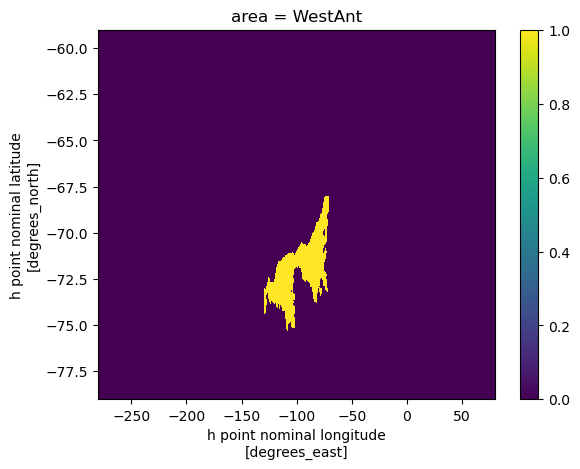

In [12]:
mask_DSW_all['mom6_01'].sel(area='WestAnt').plot()

In [23]:
# Land and contour data
depth_1_shelf, shelf_contour_1 = shelf_mask_isobath(depth_1, 'mom6_01')
depth_2_shelf, shelf_contour_2 = shelf_mask_isobath(depth_2, 'mom6_005')

In [14]:
data_1a_Weddell = data_1a.where(shelf_contour_1==1).sel(xh=slice(-58,-40))
data_2a_Weddell = data_2a.where(shelf_contour_2==1).sel(xh=slice(-58,-40))

data_1a_C_Weddell = data_1a_C.where(shelf_contour_1==1).sel(xh=slice(-58,-40))
data_2a_C_Weddell = data_2a_C.where(shelf_contour_2==1).sel(xh=slice(-58,-40))

data_1a_M_Weddell = data_1a_M.where(shelf_contour_1==1).sel(xh=slice(-58,-40))
data_2a_M_Weddell = data_2a_M.where(shelf_contour_2==1).sel(xh=slice(-58,-40))

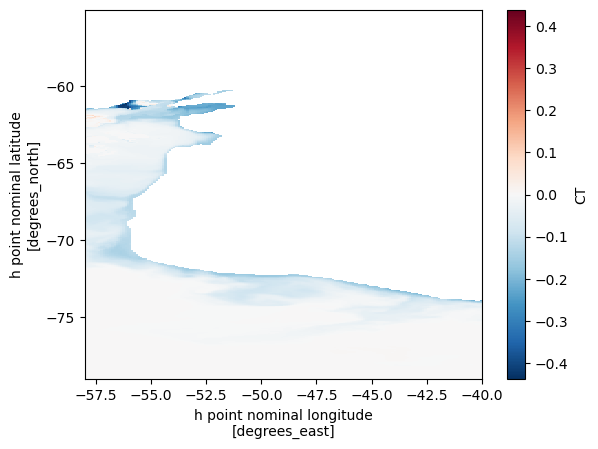

In [16]:
data_1a_Weddell.plot()

In [17]:
# # Just formation region
# data_1a_Weddell = data_1a.where(mask_DSW_all['mom6_01'].sel(area='Weddell')==1)
# data_2a_Weddell = data_2a.where(mask_DSW_all['mom6_005'].sel(area='Weddell')==1)

# data_1a_C_Weddell = data_1a_C.where(mask_DSW_all['mom6_01'].sel(area='Weddell')==1)
# data_2a_C_Weddell = data_2a_C.where(mask_DSW_all['mom6_005'].sel(area='Weddell')==1)

# data_1a_M_Weddell = data_1a_M.where(mask_DSW_all['mom6_01'].sel(area='Weddell')==1)
# data_2a_M_Weddell = data_2a_M.where(mask_DSW_all['mom6_005'].sel(area='Weddell')==1)

# # Spatial average
# data_1a_Weddell_ave = (area_corr_01 * data_1a_Weddell).sum(['xh', 'yh']) / area_corr_01.where(mask_DSW_all['mom6_01'].sel(area='Weddell')==1).sum(['xh', 'yh'])
# data_2a_Weddell_ave = (area_corr_005 * data_2a_Weddell).sum(['xh', 'yh']) / area_corr_005.where(mask_DSW_all['mom6_005'].sel(area='Weddell')==1).sum(['xh', 'yh'])

# data_1a_C_Weddell_ave = (area_corr_01 * data_1a_C_Weddell).sum(['xh', 'yh']) / area_corr_01.where(mask_DSW_all['mom6_01'].sel(area='Weddell')==1).sum(['xh', 'yh'])
# data_2a_C_Weddell_ave = (area_corr_005 * data_2a_C_Weddell).sum(['xh', 'yh']) / area_corr_005.where(mask_DSW_all['mom6_005'].sel(area='Weddell')==1).sum(['xh', 'yh'])

# data_1a_M_Weddell_ave = (area_corr_01 * data_1a_M_Weddell).sum(['xh', 'yh']) / area_corr_01.where(mask_DSW_all['mom6_01'].sel(area='Weddell')==1).sum(['xh', 'yh'])
# data_2a_M_Weddell_ave = (area_corr_005 * data_2a_M_Weddell).sum(['xh', 'yh']) / area_corr_005.where(mask_DSW_all['mom6_005'].sel(area='Weddell')==1).sum(['xh', 'yh'])

In [18]:
# Spatial average
data_1a_Weddell_ave = (area_corr_01 * data_1a_Weddell).sum(['xh', 'yh']) / area_corr_01.where(shelf_contour_1==1).sel(xh=slice(-58,-40)).sum(['xh', 'yh'])
data_2a_Weddell_ave = (area_corr_005 * data_2a_Weddell).sum(['xh', 'yh']) / area_corr_005.where(shelf_contour_2==1).sel(xh=slice(-58,-40)).sum(['xh', 'yh'])

data_1a_C_Weddell_ave = (area_corr_01 * data_1a_C_Weddell).sum(['xh', 'yh']) / area_corr_01.where(shelf_contour_1==1).sel(xh=slice(-58,-40)).sum(['xh', 'yh'])
data_2a_C_Weddell_ave = (area_corr_005 * data_2a_C_Weddell).sum(['xh', 'yh']) / area_corr_005.where(shelf_contour_2==1).sel(xh=slice(-58,-40)).sum(['xh', 'yh'])

data_1a_M_Weddell_ave = (area_corr_01 * data_1a_M_Weddell).sum(['xh', 'yh']) / area_corr_01.where(shelf_contour_1==1).sel(xh=slice(-58,-40)).sum(['xh', 'yh'])
data_2a_M_Weddell_ave = (area_corr_005 * data_2a_M_Weddell).sum(['xh', 'yh']) / area_corr_005.where(shelf_contour_2==1).sel(xh=slice(-58,-40)).sum(['xh', 'yh'])

In [19]:
data_1a_Weddell_ave.load()
data_2a_Weddell_ave.load()

data_1a_C_Weddell_ave.load()
data_2a_C_Weddell_ave.load()

data_1a_M_Weddell_ave.load()
data_2a_M_Weddell_ave.load()

<xarray.DataArray ()> Size: 8B
array(-1.652037)
Coordinates:
    z_l       float64 8B 0.5413
    time      object 8B 2010-12-16 12:00:00
    variable  <U2 8B 'so'

In [20]:
data_1a_C_Weddell_ave.load()

<xarray.DataArray ()> Size: 4B
array(-1.6751633, dtype=float32)
Coordinates:
    z_l      float64 8B 0.5413
    time     object 8B 2005-05-16 12:00:00

In [21]:
data_1a_M_Weddell_ave.load()

<xarray.DataArray ()> Size: 4B
array(-1.7133292, dtype=float32)
Coordinates:
    z_l      float64 8B 0.5413
    time     object 8B 2005-05-16 12:00:00

In [22]:
# Percentage decrease

print('1/10th temp percentage decrease in Weddell =', (data_1a_M_Weddell_ave/data_1a_C_Weddell_ave).item())
print('1/20th temp percentage decrease in Weddell =', (data_2a_M_Weddell_ave/data_2a_C_Weddell_ave).item())

1/10th temp percentage decrease in Weddell = 1.0227833986282349
1/20th temp percentage decrease in Weddell = 1.0484020181039067


In [43]:
# Mid-depth West Antarctica
data_1b_WA = data_1b.where(mask_DSW_all['mom6_01'].sel(area='WestAnt')==1)
data_2b_WA = data_2b.where(mask_DSW_all['mom6_005'].sel(area='WestAnt')==1)

In [44]:
data_1b_C_WA = data_1b_C.where(mask_DSW_all['mom6_01'].sel(area='WestAnt')==1)

In [45]:
data_2b_C_WA = data_2b_C.where(mask_DSW_all['mom6_005'].sel(area='WestAnt')==1)

In [46]:
data_1b_M_WA = data_1b_M.where(mask_DSW_all['mom6_01'].sel(area='WestAnt')==1)

In [47]:
data_2b_M_WA = data_2b_M.where(mask_DSW_all['mom6_005'].sel(area='WestAnt')==1)

In [48]:
# Spatial average
data_1b_WA_ave = (area_corr_01 * data_1b_WA).sum(['xh', 'yh']) / area_corr_01.where(mask_DSW_all['mom6_01'].sel(area='WestAnt')==1).sum(['xh', 'yh'])
data_2b_WA_ave = (area_corr_005 * data_2b_WA).sum(['xh', 'yh']) / area_corr_005.where(mask_DSW_all['mom6_005'].sel(area='WestAnt')==1).sum(['xh', 'yh'])

data_1b_WA_C_ave = (area_corr_01 * data_1b_C_WA).sum(['xh', 'yh']) / area_corr_01.where(mask_DSW_all['mom6_01'].sel(area='WestAnt')==1).sum(['xh', 'yh'])
data_2b_WA_C_ave = (area_corr_005 * data_2b_C_WA).sum(['xh', 'yh']) / area_corr_005.where(mask_DSW_all['mom6_005'].sel(area='WestAnt')==1).sum(['xh', 'yh'])
data_1b_WA_M_ave = (area_corr_01 * data_1b_M_WA).sum(['xh', 'yh']) / area_corr_01.where(mask_DSW_all['mom6_01'].sel(area='WestAnt')==1).sum(['xh', 'yh'])
data_2b_WA_M_ave = (area_corr_005 * data_2b_M_WA).sum(['xh', 'yh']) / area_corr_005.where(mask_DSW_all['mom6_005'].sel(area='WestAnt')==1).sum(['xh', 'yh'])

In [49]:
# Percentage decrease

print('1/10th temp percentage increase in West Ant. =', (data_1b_WA_M_ave/data_1b_WA_C_ave).item())
print('1/20th temp percentage increase in West Ant. =', (data_2b_WA_M_ave/data_2b_WA_C_ave).item())

1/10th temp percentage increase in West Ant. = 1.0221885220917952
1/20th temp percentage increase in West Ant. = 1.028364896774292


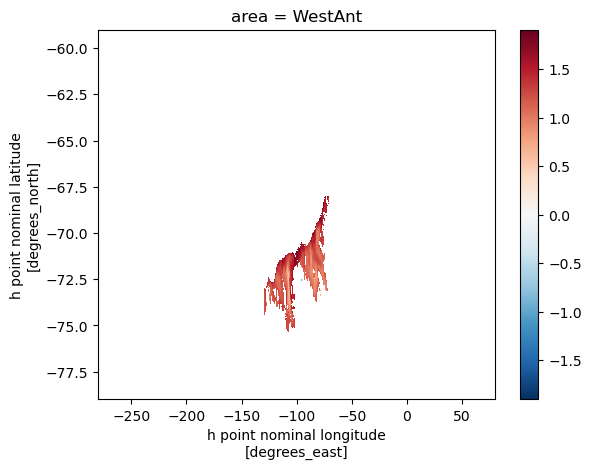

In [50]:
data_2b_C_WA.plot()

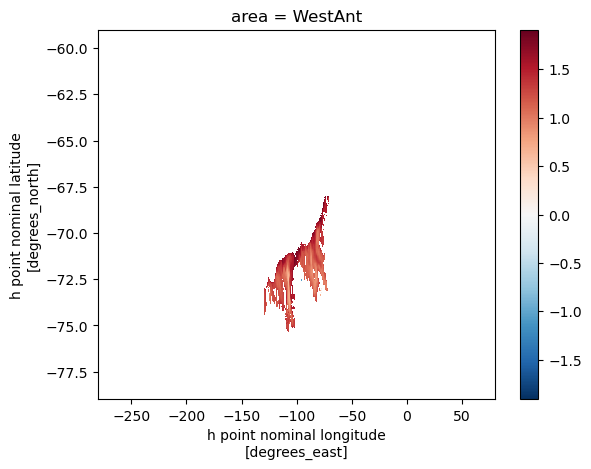

In [51]:
data_2b_M_WA.plot()

#### For off-shelf region

In [30]:
# Shelf mask

def shelf_mask_2000_isobath(var, model_dict):

    paths = {
             "mom6_01": "/g/data/g40/kc5856/panant-01-2500m-isobath-contour_masked_above.nc",
            "mom6_005": "/g/data/g40/kc5856/panant-005-2500m-isobath-contour_masked_above.nc"
    }
    var = var.cf.sel({'latitude': slice(-90, -59)})

    if paths[model_dict][-3:] == '.nc':
        shelf_mask = xr.open_dataset(paths[model_dict])['contour_masked_above']
    else:
        contour_file = np.load(paths[model_dict])
        shelf_mask = xr.DataArray(contour_file['contour_masked_above'],
                                  coords = var.coords, 
                                  dims = var.dims,
                                  name = 'contour_masked_above')
    
    shelf_mask = xr.where(shelf_mask == 0, 1, 0)
    masked_var = var * shelf_mask
    
    return masked_var, shelf_mask

In [53]:
# Define off-shelf region box
off_shelf_region = {
    "name": "OffShelf_0_60E",
    "lon_bounds": (0, 60),         # 0°E to 60°E
    "lat_max": -65                # south of 75°S
}

models = {
    "mom6_01": {
        "xh": depth_1["xh"], 
        "yh": depth_1["yh"], 
        "land_mask": land_mask_1
    },
    "mom6_005": {
        "xh": depth_2["xh"], 
        "yh": depth_2["yh"], 
        "land_mask": land_mask_2
    }
}

mask_offshelf_all = {}

for model_name, data in models.items():
    xh, yh, land_mask = data["xh"], data["yh"], data["land_mask"]

    # --- Step 1: Start with a rectangular mask in lon/lat ---    
    rect_mask = (yh <= -65)
    
    # --- Step 2: Get shelf mask (2000 m isobath) ---
    rect_mask, shelf_mask = shelf_mask_2000_isobath(rect_mask, model_name)
    
    # --- Step 3: Off-shelf = in box AND NOT on-shelf ---
    offshelf_mask = rect_mask.where(shelf_mask==0).sel(xh=slice(0,60))
    
    # Apply land mask
    offshelf_mask = offshelf_mask.where(land_mask == 0)
    
    mask_offshelf_all[model_name] = offshelf_mask


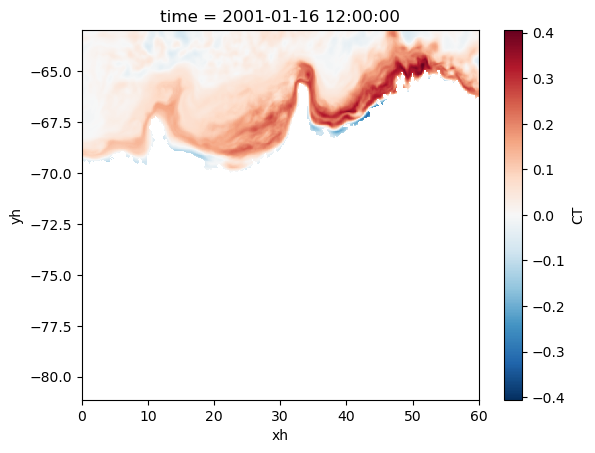

In [54]:
data_1b.where(mask_offshelf_all['mom6_01']==0).sel(yh=slice(None,-63)).plot()

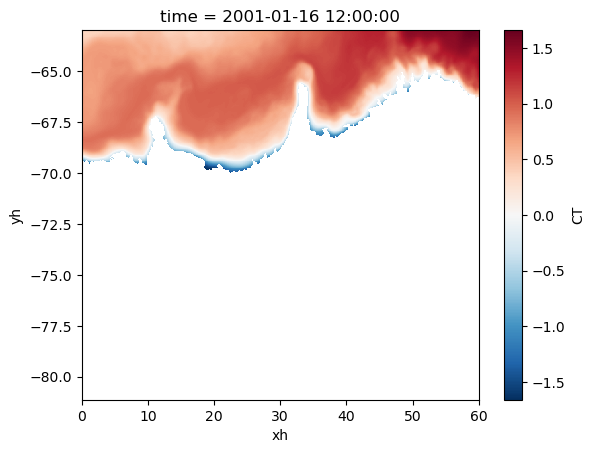

In [55]:
data_1b_C.where(mask_offshelf_all['mom6_01']==0).sel(yh=slice(None,-63)).plot()

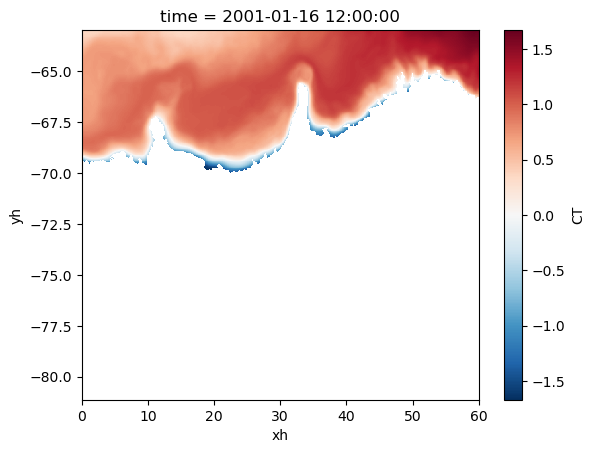

In [56]:
data_1b_M.where(mask_offshelf_all['mom6_01']==0).sel(yh=slice(None,-63)).plot()

In [57]:
data_1b_offshelf = data_1b.where(mask_offshelf_all['mom6_01']==0).sel(yh=slice(None,-63))
data_2b_offshelf = data_2b.where(mask_offshelf_all['mom6_005']==0).sel(yh=slice(None,-63))

data_1b_C_offshelf = data_1b_C.where(mask_offshelf_all['mom6_01']==0).sel(yh=slice(None,-63))
data_2b_C_offshelf = data_2b_C.where(mask_offshelf_all['mom6_005']==0).sel(yh=slice(None,-63))

data_1b_M_offshelf = data_1b_M.where(mask_offshelf_all['mom6_01']==0).sel(yh=slice(None,-63))
data_2b_M_offshelf = data_2b_M.where(mask_offshelf_all['mom6_005']==0).sel(yh=slice(None,-63))

In [58]:
# Spatial average
data_1b_offshelf_ave = (area_corr_01 * data_1b_offshelf).sum(['xh', 'yh']) / area_corr_01.where(mask_offshelf_all['mom6_01']==0).sel(yh=slice(None,-63)).sum(['xh', 'yh'])
data_2b_offshelf_ave = (area_corr_005 * data_2b_offshelf).sum(['xh', 'yh']) / area_corr_005.where(mask_offshelf_all['mom6_005']==0).sel(yh=slice(None,-63)).sum(['xh', 'yh'])

data_1b_C_offshelf_ave = (area_corr_01 * data_1b_C_offshelf).sum(['xh', 'yh']) / area_corr_01.where(mask_offshelf_all['mom6_01']==0).sel(yh=slice(None,-63)).sum(['xh', 'yh'])
data_2b_C_offshelf_ave = (area_corr_005 * data_2b_C_offshelf).sum(['xh', 'yh']) / area_corr_005.where(mask_offshelf_all['mom6_005']==0).sel(yh=slice(None,-63)).sum(['xh', 'yh'])
data_1b_M_offshelf_ave = (area_corr_01 * data_1b_M_offshelf).sum(['xh', 'yh']) / area_corr_01.where(mask_offshelf_all['mom6_01']==0).sel(yh=slice(None,-63)).sum(['xh', 'yh'])
data_2b_M_offshelf_ave = (area_corr_005 * data_2b_M_offshelf).sum(['xh', 'yh']) / area_corr_005.where(mask_offshelf_all['mom6_005']==0).sel(yh=slice(None,-63)).sum(['xh', 'yh'])

In [59]:
print('1/10 temperature increase 0-60E =', (data_1b_M_offshelf_ave/data_1b_C_offshelf_ave).item())
print('1/20 temperature increase 0-60E =', (data_2b_M_offshelf_ave/data_2b_C_offshelf_ave).item())

1/10 temperature increase 0-60E = 1.0907513528408865
1/20 temperature increase 0-60E = 1.0781313180923462


#### Cooling signal

In [13]:
# Define off-shelf region box
off_shelf_region = {
    "name": "OffShelf_0_60E",
    "lon_bounds": (-60, 60),         # 0°E to 60°E
    "lat_max": -65                # south of 75°S
}

models = {
    "mom6_01": {
        "xh": depth_1["xh"], 
        "yh": depth_1["yh"], 
        "land_mask": land_mask_1
    },
    "mom6_005": {
        "xh": depth_2["xh"], 
        "yh": depth_2["yh"], 
        "land_mask": land_mask_2
    }
}

mask_offshelf_all = {}

for model_name, data in models.items():
    xh, yh, land_mask = data["xh"], data["yh"], data["land_mask"]

    # --- Step 1: Start with a rectangular mask in lon/lat ---    
    rect_mask = (yh <= -65)
    
    # --- Step 2: Get shelf mask (2000 m isobath) ---
    rect_mask, shelf_mask = shelf_mask_2000_isobath(rect_mask, model_name)
    
    # --- Step 3: Off-shelf = in box AND NOT on-shelf ---
    offshelf_mask = rect_mask.where(shelf_mask==0).sel(xh=slice(0,60))
    
    # Apply land mask
    offshelf_mask = offshelf_mask.where(land_mask == 0)
    
    mask_offshelf_all[model_name] = offshelf_mask


In [31]:
# Land and contour data
depth_1_shelf, shelf_contour_2500_1 = shelf_mask_2000_isobath(depth_1, 'mom6_01')
depth_2_shelf, shelf_contour_2500_2 = shelf_mask_2000_isobath(depth_2, 'mom6_005')

In [15]:
data_1b_C_slim = data_1b_C.sel(xh=slice(-60,60)).where(shelf_contour_1==0).where(mask_offshelf_all['mom6_01']==1)

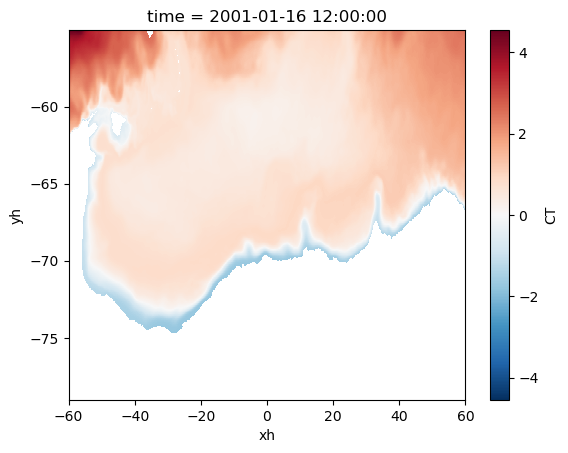

In [27]:
data_1b_C.sel(xh=slice(-60,60)).where(shelf_contour_1==0).plot()

In [45]:
data_1b_C_slim = data_1b_C.sel(xh=slice(-60,60)).where(shelf_contour_2500_1==1).where(shelf_contour_1==0)
data_1b_M_slim = data_1b_M.sel(xh=slice(-60,60)).where(shelf_contour_2500_1==1).where(shelf_contour_1==0)

data_2b_C_slim = data_2b_C.sel(xh=slice(-60,60)).where(shelf_contour_2500_2==1).where(shelf_contour_2==0)
data_2b_M_slim = data_2b_M.sel(xh=slice(-60,60)).where(shelf_contour_2500_2==1).where(shelf_contour_2==0)

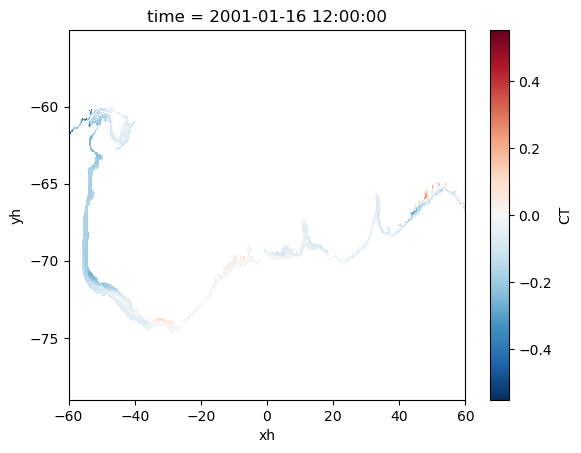

In [47]:
(data_1b_M_slim-data_1b_C_slim).plot()

In [48]:
# Spatial average
data_1b_C_slim_ave = (area_corr_01 * data_1b_C_slim).sum(['xh', 'yh']) / area_corr_01.sel(xh=slice(-60,60)).where(shelf_contour_2500_1==1).where(shelf_contour_1==0).sum(['xh', 'yh'])
data_2b_C_slim_ave = (area_corr_005 * data_2b_C_slim).sum(['xh', 'yh']) / area_corr_005.sel(xh=slice(-60,60)).where(shelf_contour_2500_2==1).where(shelf_contour_2==0).sum(['xh', 'yh'])
data_1b_M_slim_ave = (area_corr_01 * data_1b_M_slim).sum(['xh', 'yh']) / area_corr_01.sel(xh=slice(-60,60)).where(shelf_contour_2500_1==1).where(shelf_contour_1==0).sum(['xh', 'yh'])
data_2b_M_slim_ave = (area_corr_005 * data_2b_M_slim).sum(['xh', 'yh']) / area_corr_005.sel(xh=slice(-60,60)).where(shelf_contour_2500_2==1).where(shelf_contour_2==0).sum(['xh', 'yh'])

In [49]:
data_1b_C_slim_ave.load().item()

-0.8483565935843477

In [50]:
data_1b_M_slim_ave.load().item()

-0.925537694654041

In [55]:
print('% decrease in offshelf cooling for 1/10 =', (data_1b_M_slim_ave/data_1b_C_slim_ave -1 ).item())
print('% decrease in offshelf cooling for 1/20 =', (data_2b_M_slim_ave/data_2b_C_slim_ave -1 ).item())

% decrease in offshelf cooling for 1/10 = 0.09097719243696734
% decrease in offshelf cooling for 1/20 = 0.18184733390808105
